In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Drop the 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [9]:
for i in df.columns:
  print(i,df[i].unique())
  print('--'*100)

gender ['Female' 'Male']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 1

In [10]:
# Replace 'No phone service' with 'No'
df['MultipleLines'].replace('No phone service', 'No', inplace=True)
df['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
df['OnlineBackup'].replace('No internet service', 'No', inplace=True)
df['DeviceProtection'].replace('No internet service', 'No', inplace=True)
df['TechSupport'].replace('No internet service', 'No', inplace=True)
df['StreamingTV'].replace('No internet service', 'No', inplace=True)
df['StreamingMovies'].replace('No internet service', 'No', inplace=True)

<ipython-input-10-c3037cfa7810>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace('No phone service', 'No', inplace=True)
<ipython-input-10-c3037cfa7810>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [11]:
# Convert TotalCharges to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [13]:
#filling NaN values with median of totalcharges values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-13-fc2194925d47>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
for i in df.columns:
  print(i,df[i].value_counts())
  print('--'*100)

gender gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SeniorCitizen SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Partner Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dependents Dependents
No     4933
Yes    2110
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------------

# **Data Visualizations**

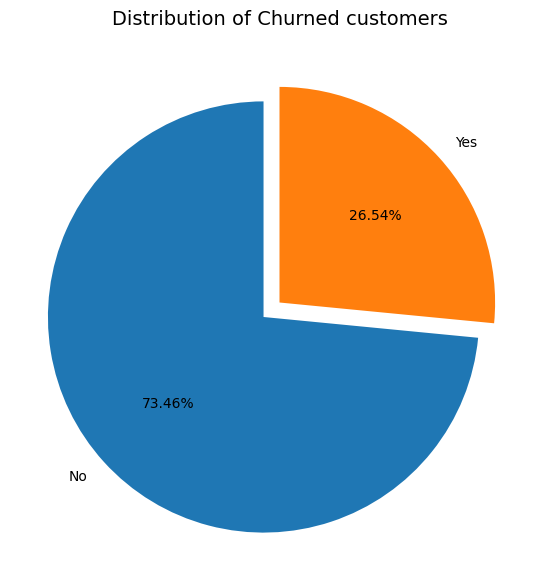

In [15]:
type_counts = df['Churn'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%',
        startangle=90, explode=(0.1, 0))
plt.title('Distribution of Churned customers', fontsize=14)
plt.show()

churn columns tells us about the number of Customers who left within the last month.
Around 26% of customers left the platform within the last month.

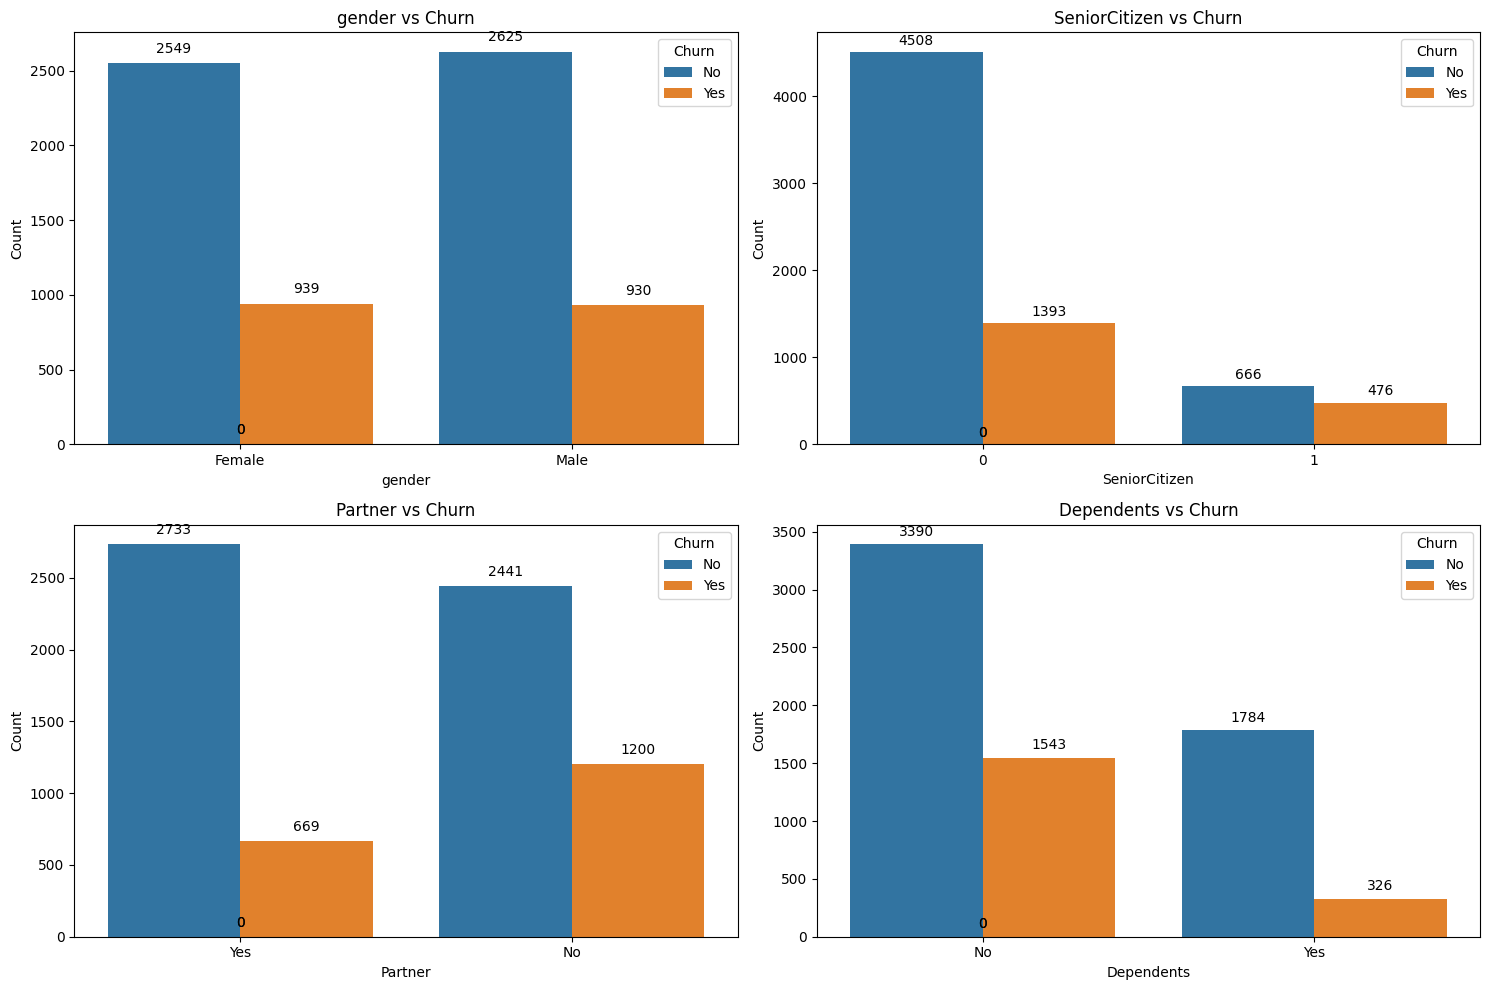

In [16]:
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, var in enumerate(l1):
    row, col = i // 2, i % 2
    sns.countplot(x=var, hue='Churn', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs Churn')
    axes[row, col].set_ylabel('Count')


    for p in axes[row, col].patches:
        height = p.get_height()
        axes[row, col].text(p.get_x() + p.get_width() / 2., height + 50,
                            str(int(height)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




*   Customer churning for male and female customers is very similar to each other!
*   Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.

*   Customers who are housing with a Partner churned less as compared to those not living with a Partner.
*   Similary, churning is high for the customers that don't have Dependents with them!






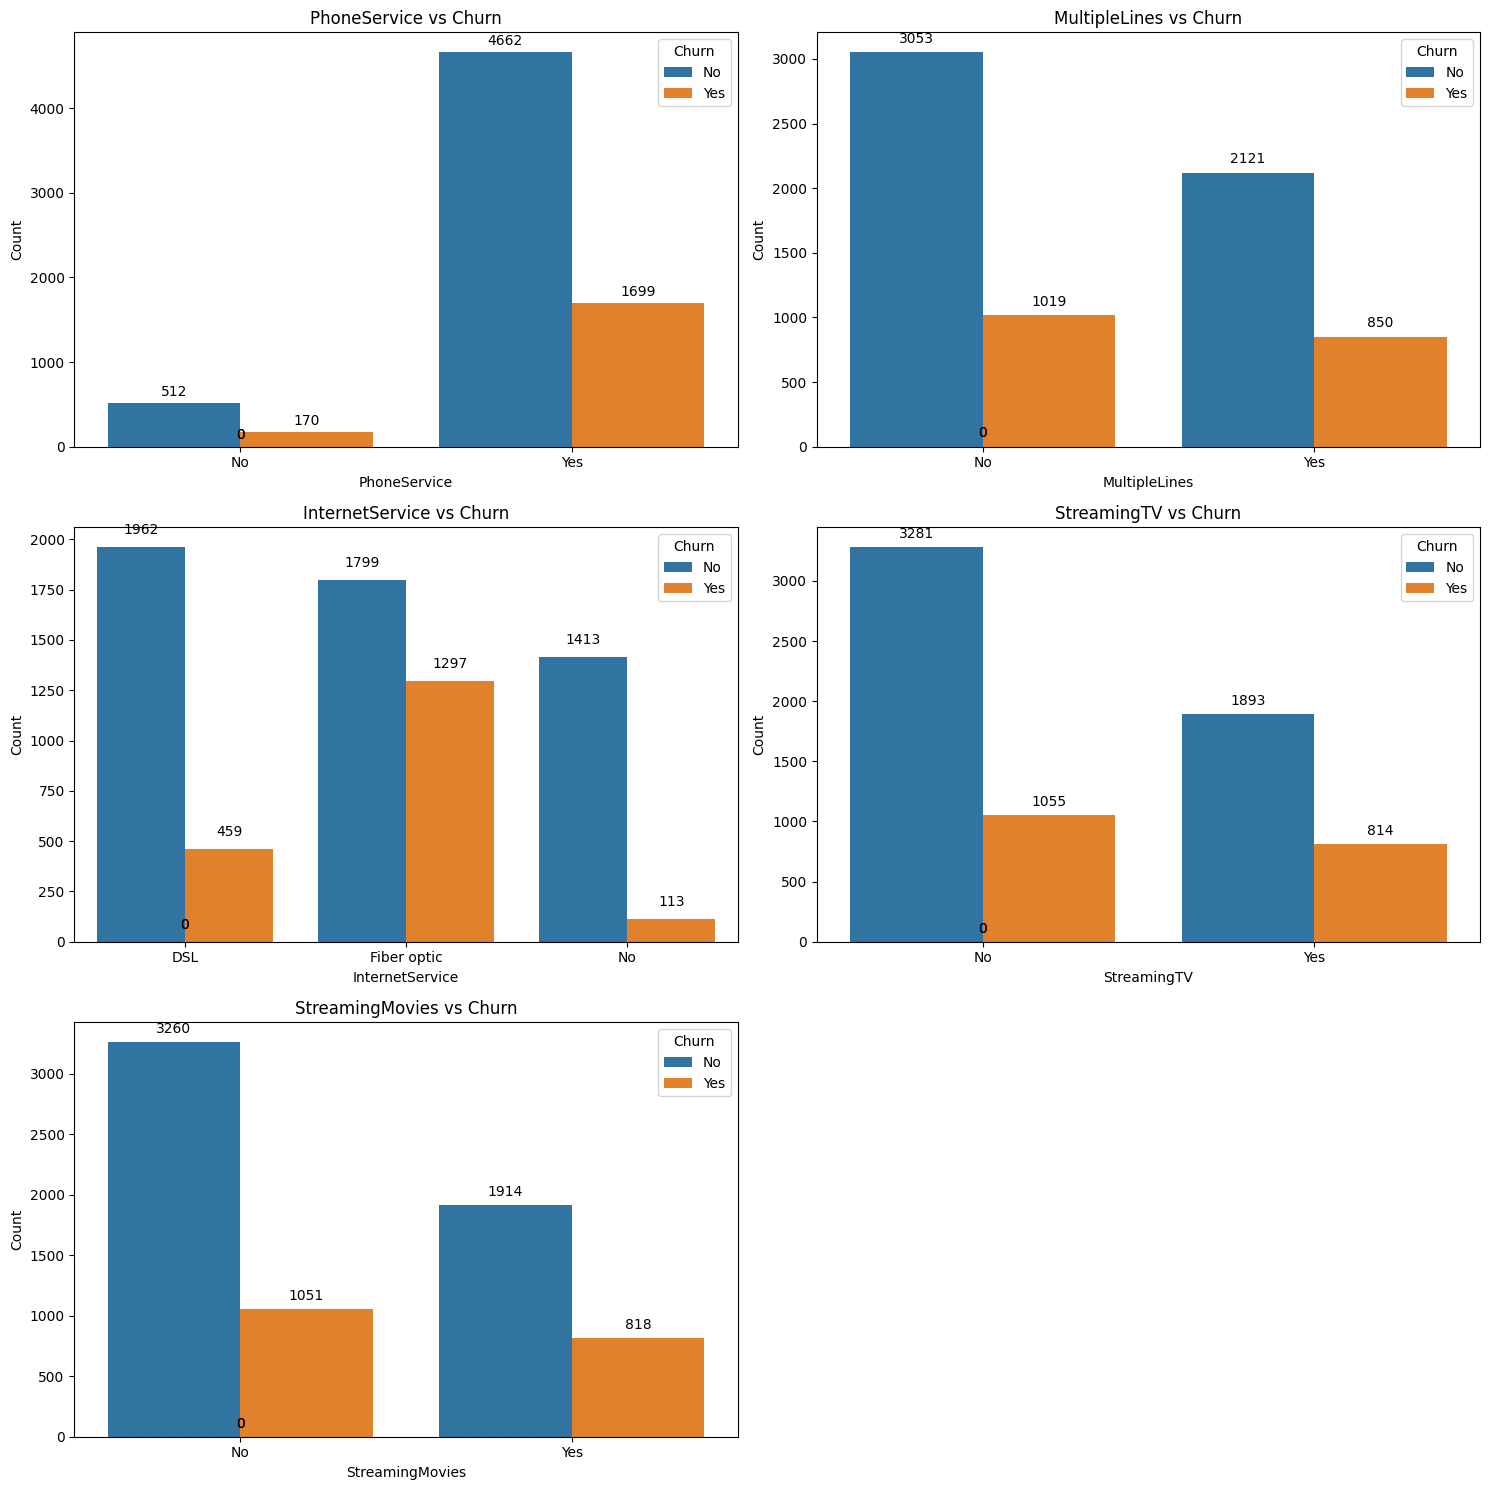

In [17]:
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axes = axes.flatten()

for i, var in enumerate(l2):
    sns.countplot(x=var, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].set_ylabel('Count')

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 50,
                     str(int(height)), ha='center', va='bottom', fontsize=10)

for j in range(len(l2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




*  For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.

*  In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.

*   A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
*  StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!







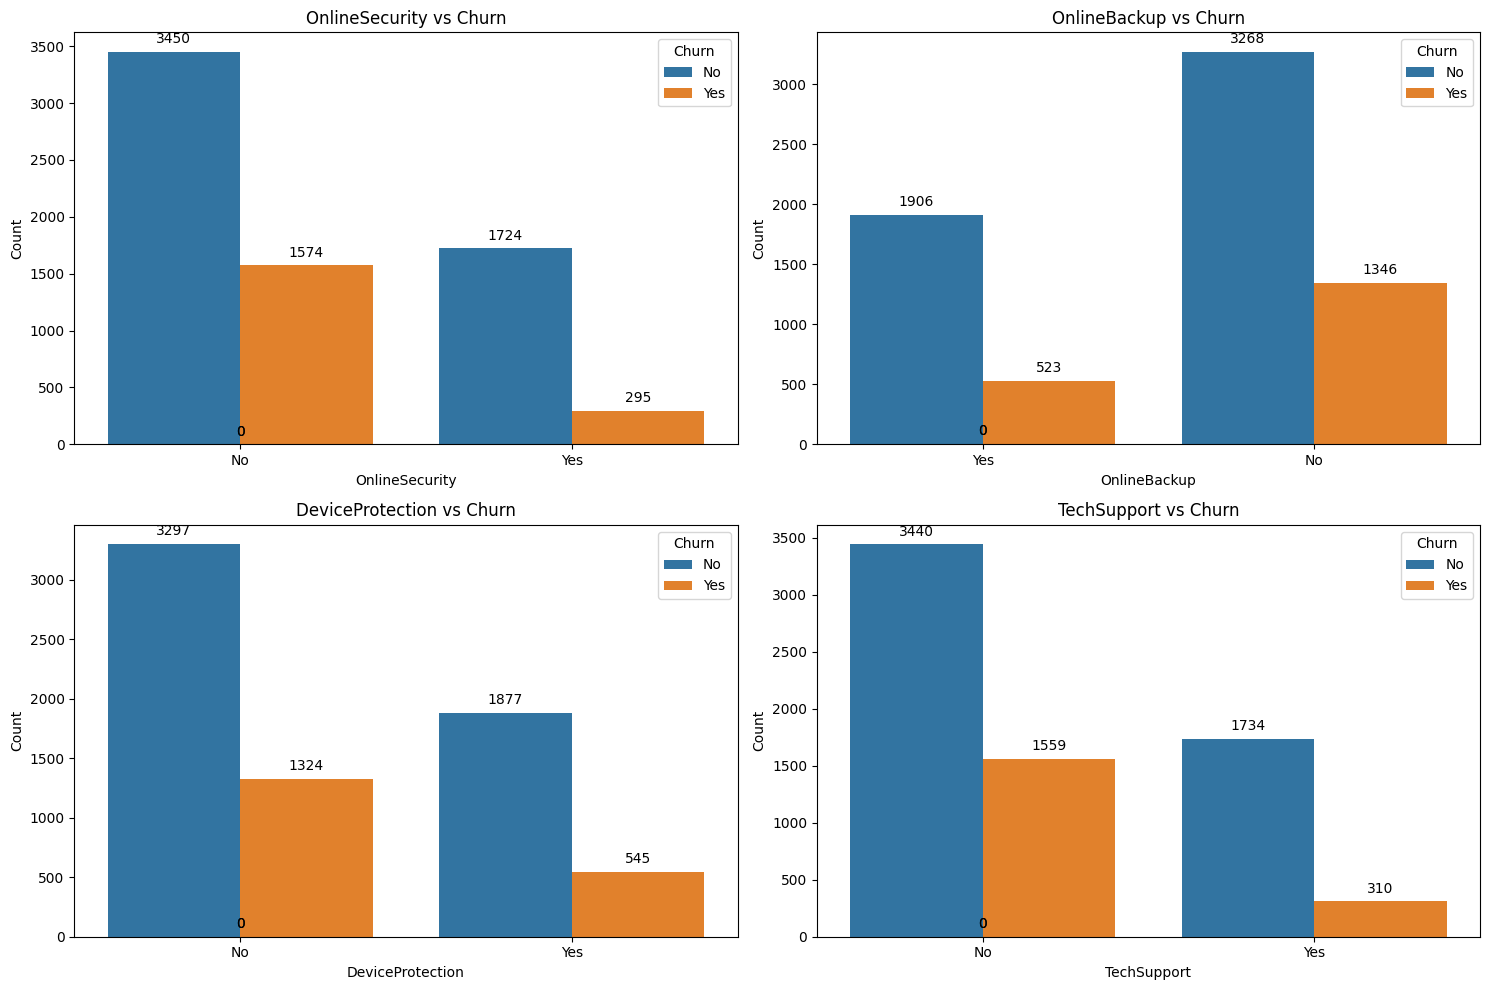

In [18]:
l2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, var in enumerate(l2):
    sns.countplot(x=var, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].set_ylabel('Count')

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 50,
                     str(int(height)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



*   A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.




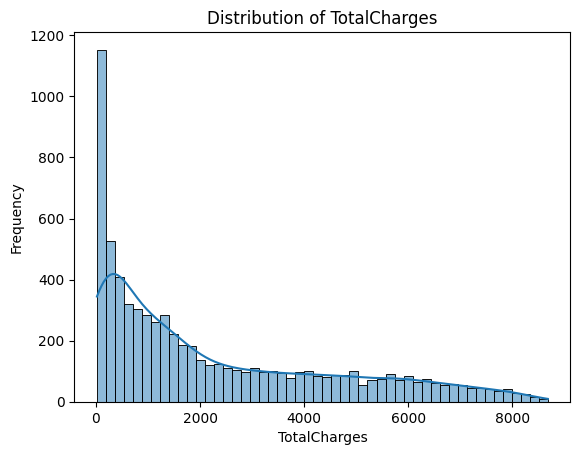

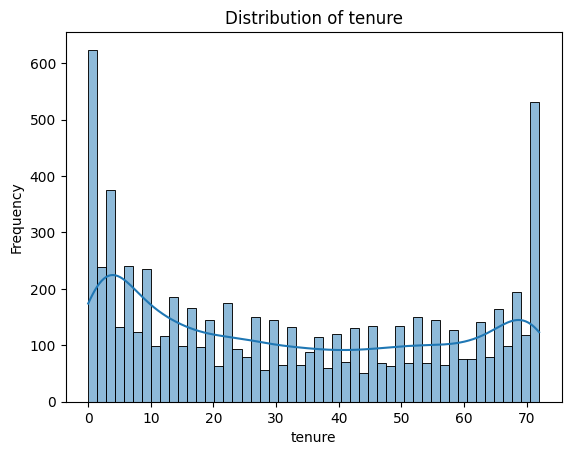

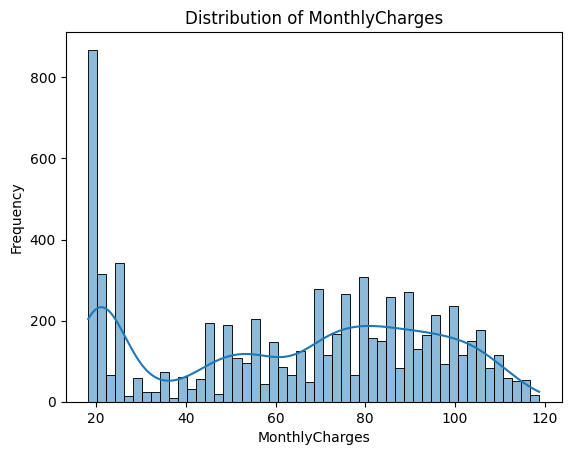

In [19]:
distribution_to_visualize = ["TotalCharges" , "tenure" , "MonthlyCharges"]
for distribution in distribution_to_visualize:
    sns.histplot(df[distribution] , bins = 50 , kde = True , edgecolor = "black")
    plt.title("Distribution of " + distribution)
    plt.xlabel(distribution)
    plt.ylabel("Frequency")
    plt.show()

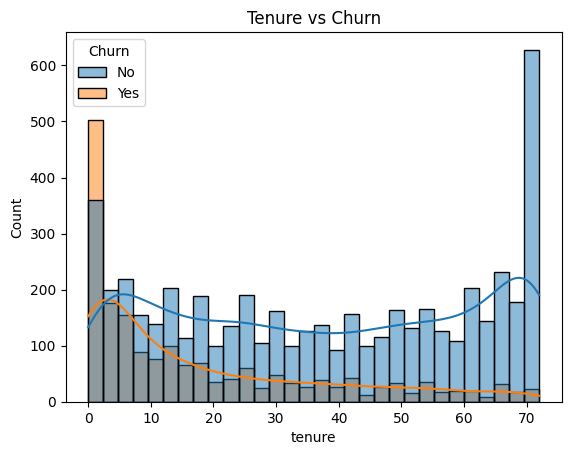

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Tenure vs Churn')
plt.show()

 It reveals that customers with lower tenures are more prone to churn, highlighting the importance of retention strategies during the initial customer journey

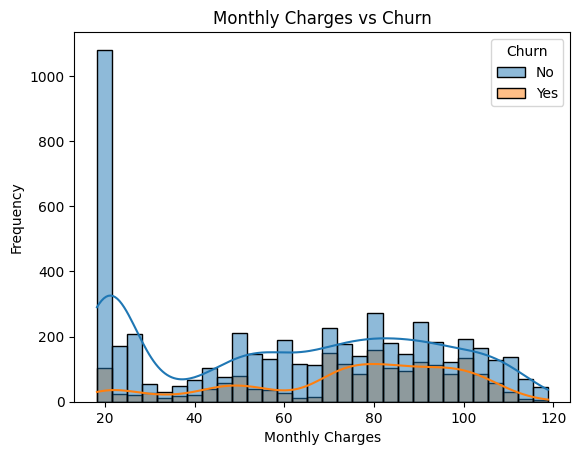

In [21]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

Distribution of monthly charges shows that customers who churn tend to have lower monthly charges compared to those who do not churn.

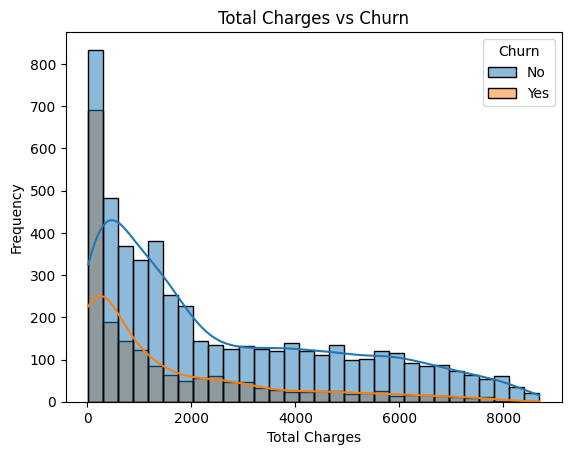

In [22]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title('Total Charges vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

Customers who churn tend to have lower total charges, with a significant number of churned customers having total charges close to zero

# **Detecting Outliers**

In [23]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

outliers_summary = outliers.sum()
print("Outliers detected per feature:\n", outliers_summary)

Outliers detected per feature:
 tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


# **Data Preprocessing for Predictive Modeling**

In [24]:
# Specify the columns for one-hot encoding and label encoding
onehot_columns = ['InternetService', 'PaymentMethod', 'Contract']
label_columns = df.select_dtypes(include=['object']).columns.difference(onehot_columns)

# Apply OneHotEncoder to the specified columns
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
encoded_data = encoder.fit_transform(df[onehot_columns])
encoded_columns = encoder.get_feature_names_out(onehot_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Apply LabelEncoder to the other categorical columns
label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Drop the original one-hot encoded columns and concatenate the new columns
df = df.drop(onehot_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

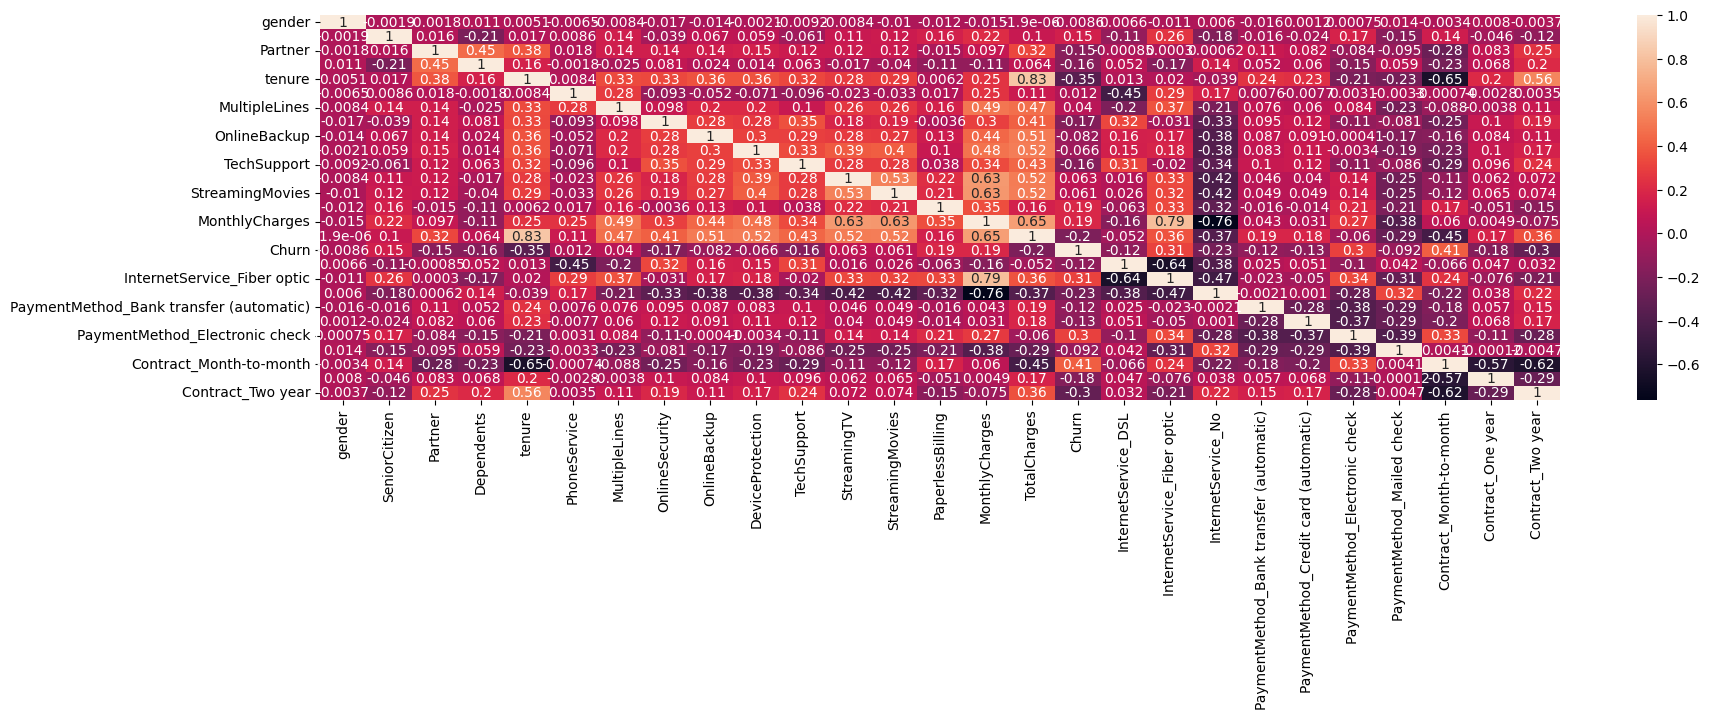

In [25]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

# **Predictive Modeling**

In [30]:
x = df.drop('Churn', axis=1)
y = df['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=45)

smote = SMOTE(random_state=42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)


rf = RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.8001

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1307
           1       0.64      0.52      0.57       454

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761


Confusion Matrix:
[[1174  133]
 [ 219  235]]


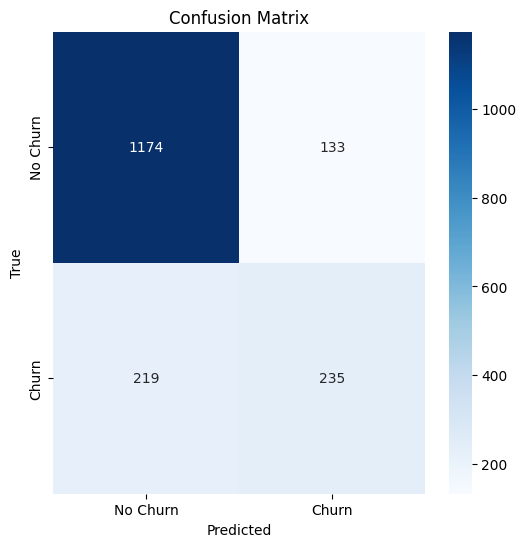

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

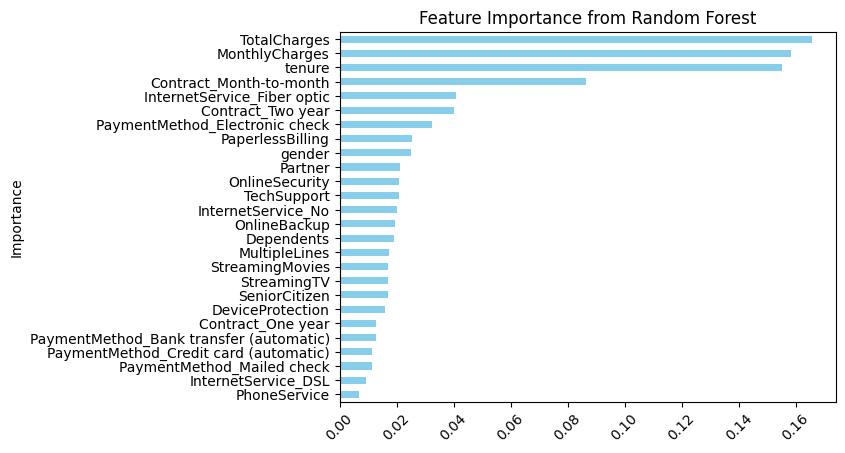

In [34]:
feature_importances = rf.feature_importances_

feature_names = xtrain.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

TotalCharges, MonthlyCharges, and tenure have the highest feature importance, indicating that pricing and customer longevity are key determinants of churn. High monthly charges or a short tenure might suggest that customers are more likely to churn, potentially due to dissatisfaction or better offers elsewhere.



In addition to these, factors like Contract type, Internet service type, and Payment method should also be considered. For instance, customers on month-to-month contracts or with certain payment methods may be more likely to churn compared to those on long-term contracts or with automatic payments.




By focusing on the features with the highest importance, you can identify actionable insights to reduce churn, such as adjusting pricing strategies, offering more flexible contracts, or optimizing payment methods. On the other hand, features with low importance, like PhoneService or PaymentMethod_Mailed check, can be deprioritized in decision-making.

In [35]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))